In [5]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

DATAFILE = "../data/raw/beer_reviews.csv"
OUTDATADIR = "../data/beer/"
NUMFOLDS = 5

In [6]:
def createBeerLookup(df, save=True):
    # Create a beer lookup table of ID to name
    beerLookup = df.loc[:, ['beer_beerid', 'beer_style', 'beer_name']].copy()
    beerLookup.drop_duplicates(inplace=True)
    if save:
        beerLookup.to_csv(OUTDATADIR + "beerLookup.csv", index=False)
    return beerLookup

In [7]:
def createCollaborativeDataset(df, save=True):
    # (user, item, rating) format
    collaborativeDataset = df.loc[:, ['review_profilename', 'beer_beerid', 'review_overall']].copy()
    collaborativeDataset["review_profilename"] = collaborativeDataset["review_profilename"].astype('category').cat.codes
    collaborativeDataset = shuffle(collaborativeDataset)

    # Split datasets into folds
    splits = np.array_split(collaborativeDataset, NUMFOLDS)
    if save:
        for k, dataset in enumerate(splits):
            dataset.to_csv(OUTDATADIR + "fold" + str(k), index=False, header=False)
    return splits

In [8]:
df = pd.read_csv(DATAFILE)

In [9]:
df.head(2)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213


In [10]:
df.dropna(0, inplace=True)

In [11]:
df[['review_profilename', 'review_overall']].groupby('review_profilename').mean().sort_values('review_overall')

,review_overall
review_profilename,
mudking38,1.0
hogwildhogwild,1.0
Chris23,1.0
Fluffytaster,1.0
Tsuruchi,1.0
ODailey,1.0
bebop01,1.0
Foetaphagist,1.0
bedbug003,1.0


In [60]:
(df[['review_profilename', 'review_overall']].groupby('review_profilename').count().sort_values('review_overall') < 5).sum()

review_overall    18296
dtype: int64

In [58]:
len((df[['review_profilename', 'review_overall']].groupby('review_profilename').count()))

32908

In [14]:
df[['review_profilename', 'beer_style', 'review_overall']].groupby(['review_profilename', 'beer_style']).mean().head(2)

review_overall
review_profilename beer_style                              
0110x011           American Amber / Red Ale            4.00
                   American Barleywine                 3.25

In [15]:
df[['beer_style', 'review_overall']].groupby('beer_style').mean().head(2)

,review_overall
beer_style,
Altbier,3.831625
American Adjunct Lager,3.010392


In [16]:
df[['beer_name', 'review_overall']].groupby('beer_name').mean().count()

review_overall    44075
dtype: int64

In [17]:
beer_ratings = df[['beer_name', 'review_overall']].groupby('beer_name').agg(['mean', 'count']).review_overall

In [18]:
beer_ratings = beer_ratings[beer_ratings['count'] > 5]

In [19]:
profile_reviews = df[['review_profilename', 'beer_name', 'review_overall', 'beer_style']]

In [20]:
profile_reviews = profile_reviews.set_index('beer_name')

In [21]:
joined = profile_reviews.join(beer_ratings)

In [22]:
joined = joined.dropna()

In [23]:
joined['fixed_mean'] = (joined['mean'] * joined['count'] - joined.review_overall)/(joined['count'] - 1)

In [49]:
((joined.review_overall - 3.83105) ** 2).mean() ** .5

0.7140937397835865

In [44]:
joined.review_overall.mean()

3.8310504561880374

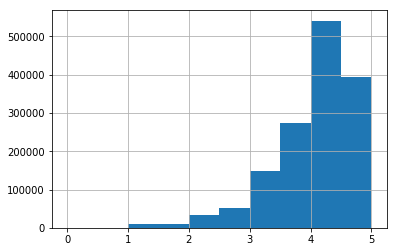

In [26]:

joined.review_overall.hist()

In [222]:
joined.groupby('beer_name').first().sort_values(['mean'])

,review_profilename,review_overall,beer_style,mean,count,fixed_mean
beer_name,,,,,,
Crazy Ed's Cave Creek Chili Beer,clr231,2.0,Chile Beer,1.488764,267.0,1.486842
Original C Cave Creek Chili Beer - Cerveza Con Chili,riversider76,3.5,Chile Beer,1.681818,132.0,1.667939
Bud Light Chelada,Van55,2.0,Fruit / Vegetable Beer,1.710526,114.0,1.707965
Wild Blue (Blueberry Lager),Thorpe429,1.0,Fruit / Vegetable Beer,1.924116,481.0,1.926042
Budweiser Chelada,msubulldog25,2.0,Fruit / Vegetable Beer,1.931159,138.0,1.930657
Bud Extra,jasonjlewis,4.0,Herbed / Spiced Beer,1.953125,128.0,1.937008
Corona Light,fido,1.5,Light Lager,1.957602,342.0,1.958944
Brewer Patriot Collection - 1790 Root Beer Brew,51mmz0rz,3.0,Herbed / Spiced Beer,2.089286,196.0,2.084615
Michelob Ultra,chiapete,2.0,Light Lager,2.159962,522.0,2.160269
